In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({
    'Hours': [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4],
    'Pass':[0, 0, 0, 0, 1, 1, 1, 1]
})
df

,Hours,Pass
0,0.5,0
1,1.0,0
2,1.5,0
3,2.0,0
4,2.5,1
5,3.0,1
6,3.5,1
7,4.0,1


In [3]:
# Nên chuyển về vector dạng cột -> chuyển về dạng ma trận N dòng 1 cột -> Chuẩn với toán học
class LogisticRegession:
    def __init__(self,lr = 0.01, batch_size = 1, epochs = 100, shuffle = False, threshold = 0.5, verbose = 1):
        self.lr = lr # learning rate
        self.batch_size = batch_size # num sample to training
        self.epochs = epochs # epoch: Number of times the model is learned in all data
        self.shuffle = shuffle # allow shuffle data in each epoch
        self.w = None
        self.Nfeature = None # number of feature of data train
        self.Nsample = None # number of sample of data train
        self.Losses = [] # List of loss of each epoch
        self.threshold = threshold # threshold to decision class
        self.score = [] # list of accuracy score
        self.verbose = verbose # print chi tiết huấn luyện của mô hình [0 - không in, 1 - in cơ bản]
    def checkDim(self,X):
        if X.ndim == 1:
            raise ValueError("X must be 2 Dimensional")
        return 1
    # add feature have value = 1 on head each sample
    def addfeature1(self,X):
        if self.checkDim(X):
            if X.shape[1] == self.Nfeature + 1: return X
            else:
                feature1 = np.ones(X.shape[0]).reshape(-1,1)
                return np.concatenate((feature1,X),axis = 1)
    # function predict probability 
    def predict_proba(self,X):
        X = self.addfeature1(X)
        z = X@self.w
        return 1/(1+np.e**(-z))
    def predict(self,X):
        y_proba = self.predict_proba(X)
        return np.where(y_proba>self.threshold, 1, 0)

    # Compute Loss - Bindry cross entropy
    def compute_loss(self,y_pred,y):
        return np.mean(-y*np.log(y_pred) - (1-y)*np.log(1-y_pred))

    # Compute gradient Loss with w
    def dL_dw(self,y_pred,y,X):
        return X.T@(y_pred - y)*1/X.shape[0] # / for X.shape[0] because the sample of X != batch_size

    # function training model
    def fit(self,X,y):
        self.Nsample, self.Nfeature = X.shape
        # add feature 1 for X
        X = self.addfeature1(X)
        y = y.reshape(-1,1)
        self.w = np.random.uniform(-1,1,size= self.Nfeature+1).reshape(-1,1)# w is matrix have shape (Nfeatur,1)
        data_train = np.concatenate((X,y),axis = 1)
        for epoch in range(self.epochs):
            if self.shuffle: np.random.shuffle(data_train)
            epoch_Loss = [] # Loss of 1 epoch
            epoch_accu_score = [] # list_accu_score of 1 epoch 
            for i in range(0,self.Nsample,self.batch_size):
                batch = data_train[i:i+self.batch_size]
                X_train, y_train = batch[:,:-1], batch[:,-1].reshape(-1,1)
                y_proba = self.predict_proba(X_train)
                y_pred = self.predict(X_train)
                loss = self.compute_loss(y_proba,y_train)
                epoch_Loss.append(loss) # append loss of each batch
                accuracy = np.sum(y_pred == y_train)/y_train.shape[0]
                epoch_accu_score.append(accuracy)
                dL_dw = self.dL_dw(y_proba,y_train,X_train)
                self.w -= self.lr*dL_dw
            self.Losses.append(sum(epoch_Loss)/len(epoch_Loss))
            self.score.append(sum(epoch_accu_score)/len(epoch_accu_score))
            if self.verbose:
                print(f"epoch: {epoch+1:<5} ====== Loss = {self.Losses[-1].item():<10.4f}========== accuracy = {self.score[-1]:<5.2f} ============ w = {str(self.w.reshape(1,-1)):<20}")

In [4]:
X_train, y_train = df.iloc[:,:-1].to_numpy(), df.iloc[:,-1].to_numpy()

In [5]:
clf = LogisticRegession(lr=0.01,epochs=700,batch_size=1, threshold=0.5)

In [6]:
clf.fit(X_train,y_train)

epoch: 1     ====== Loss = 1.4220    ========== accuracy = 0.38  ============ w = [[ 0.80275139 -0.83719447]]
epoch: 2     ====== Loss = 1.3036    ========== accuracy = 0.38  ============ w = [[ 0.81958841 -0.74387118]]
epoch: 3     ====== Loss = 1.2012    ========== accuracy = 0.25  ============ w = [[ 0.83363482 -0.6573257 ]]
epoch: 4     ====== Loss = 1.1148    ========== accuracy = 0.25  ============ w = [[ 0.84479055 -0.57807557]]
epoch: 5     ====== Loss = 1.0439    ========== accuracy = 0.25  ============ w = [[ 0.85305498 -0.506353  ]]
epoch: 6     ====== Loss = 0.9868    ========== accuracy = 0.12  ============ w = [[ 0.85852716 -0.44208179]]
epoch: 7     ====== Loss = 0.9418    ========== accuracy = 0.12  ============ w = [[ 0.86138826 -0.38491416]]
epoch: 8     ====== Loss = 0.9065    ========== accuracy = 0.00  ============ w = [[ 0.86187364 -0.33430792]]
epoch: 9     ====== Loss = 0.8792    ========== accuracy = 0.00  ============ w = [[ 0.8602437  -0.28961391]]
epoch: 10 

In [7]:
clf.predict(X_train)

array([[0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1]])

In [8]:
clf.predict_proba(X_train)

array([[0.05254422],
       [0.12250001],
       [0.26003119],
       [0.4693766 ],
       [0.69008405],
       [0.84860116],
       [0.9338154 ],
       [0.97261493]])

# Ví dụ với một bộ data

In [9]:
FILE_PATH = 'data.csv'

In [10]:
df = pd.read_csv(FILE_PATH)
df.head()

,Width,Length,Result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


# Lấy thông tin thống kê cơ bản của bộ dữ liệu

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Width   100 non-null    float64
 1   Length  100 non-null    float64
 2   Result  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [12]:
df.describe()

,Width,Length,Result
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


# Lấy ra đặc trưng và target của bộ DL

In [13]:
X, y = df.iloc[:,:-1], df.iloc[:,-1]

In [14]:
X.shape, y.shape

((100, 2), (100,))

In [15]:
scaler = MinMaxScaler()

In [16]:
# Chuẩn hóa các đặc trưng của DL
X = scaler.fit_transform(X)
X[:5]

array([[0.06542784, 0.69465488],
       [0.00326632, 0.19470455],
       [0.08296784, 0.61961779],
       [0.43176427, 0.81600135],
       [0.7019434 , 0.65539214]])

In [17]:
y = y.to_numpy()

# Chia dữ liệu training và testing

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [19]:
clf = LogisticRegession(batch_size=16, epochs=1000)

In [20]:
clf.fit(X_train,y_train)

epoch: 1     ====== Loss = 0.6582    ========== accuracy = 0.60  ============ w = [[0.4711278  0.72916734 0.98641942]]
epoch: 2     ====== Loss = 0.6562    ========== accuracy = 0.60  ============ w = [[0.46156915 0.72774711 0.98424389]]
epoch: 3     ====== Loss = 0.6543    ========== accuracy = 0.60  ============ w = [[0.45210198 0.72637311 0.98211329]]
epoch: 4     ====== Loss = 0.6524    ========== accuracy = 0.60  ============ w = [[0.44272578 0.72504509 0.98002738]]
epoch: 5     ====== Loss = 0.6505    ========== accuracy = 0.60  ============ w = [[0.43344001 0.72376279 0.97798593]]
epoch: 6     ====== Loss = 0.6487    ========== accuracy = 0.60  ============ w = [[0.42424412 0.72252593 0.97598868]]
epoch: 7     ====== Loss = 0.6469    ========== accuracy = 0.60  ============ w = [[0.41513754 0.72133422 0.97403538]]
epoch: 8     ====== Loss = 0.6452    ========== accuracy = 0.60  ============ w = [[0.4061197  0.72018737 0.97212576]]
epoch: 9     ====== Loss = 0.6435    ========== 

In [21]:
y_pred = clf.predict(X_test)

In [22]:
y_proba = clf.predict_proba(X_test)
y_proba

array([[0.51838814],
       [0.33557984],
       [0.22110741],
       [0.50530794],
       [0.36546475],
       [0.43822384],
       [0.38268372],
       [0.8138528 ],
       [0.68241656],
       [0.46272707],
       [0.82367807],
       [0.64936008],
       [0.64407484],
       [0.54807059],
       [0.86704857],
       [0.78603815],
       [0.64585027],
       [0.58175288],
       [0.80974026],
       [0.72525126]])

In [23]:
print(f"accuracy_score = {accuracy_score(y_pred,y_test)}")

accuracy_score = 0.9


In [26]:
threshold_list = [0.4, 0.45, 0.5, 0.6 , 0.65, 0.7]
clf = LogisticRegession(batch_size=16, epochs=1000, verbose=0)
clf.fit(X_train,y_train)
accuracy_list = []
for threshold in threshold_list:
    clf.threshold = threshold
    y_pred = clf.predict(X_test)
    accuracy_list.append(accuracy_score(y_pred,y_test))

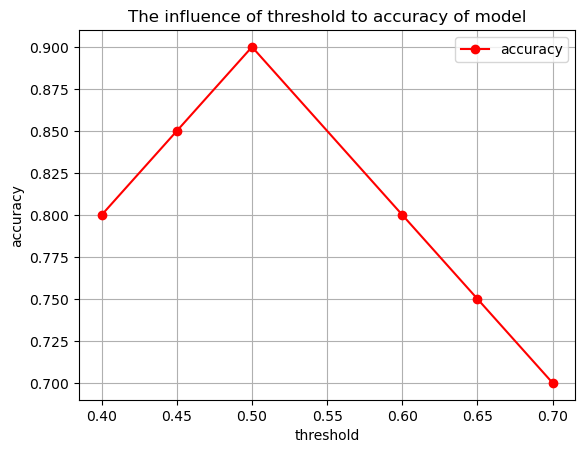

In [34]:
plt.title("The influence of threshold to accuracy of model")
plt.xlabel("threshold")
plt.ylabel("accuracy")
plt.plot(threshold_list,accuracy_list,'r',label = 'accuracy', marker = 'o')
plt.legend()
plt.grid()
plt.show()